###*IMPORT LIBRARIES*

In [37]:
# data manipulation
import pandas as pd

# data viz
import matplotlib.pyplot as plt
import seaborn as sns


# use sklearn to import a dataset
from sklearn.datasets import load_wine

###*LOAD DATA*

In [38]:
data = pd.read_csv('/content/train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


###*Q1: DIMENSIONS*

In [39]:
dim = data.shape
print("Dimension of datasets are (i.e., no of rows and no of col) : ", dim )

Dimension of datasets are (i.e., no of rows and no of col) :  (891, 12)


###*Q2: COLUMNS NAMES*

In [40]:
column_names = data.columns.tolist()
print("Column names:", column_names)

Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


###*Q3: MISSING VALUES*

In [41]:
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Age has 177 null values and cabin has 687 so we will fill these null values with NaN instead of dropping them because 177 and 687 is quiet large according to the size of dataset and dropping the null value row in embarked because it has only 2 null values.

In [42]:
data['Age'].fillna(0, inplace=True)
data['Cabin'].fillna(0, inplace=True)
data.dropna(subset=['Embarked'], inplace=True)

missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


###*Q4: DATA TYPES*

In [43]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

dtypes show the datatype of each column in the dataset.

###*Q5: SUMMARY STATICS*

In [44]:
# Calculate summary statistics for numerical columns
summary_stats = data.describe()

# Display the summary statistics
print(summary_stats)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586   23.740349    0.524184   
std     256.998173    0.486260    0.834700   17.562609    1.103705   
min       1.000000    0.000000    1.000000    0.000000    0.000000   
25%     224.000000    0.000000    2.000000    6.000000    0.000000   
50%     446.000000    0.000000    3.000000   24.000000    0.000000   
75%     668.000000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  889.000000  889.000000  
mean     0.382452   32.096681  
std      0.806761   49.697504  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


describe shows the statistics of the dataset.

###Q6: CORRELATION B/W DIFF COLUMNS

In [45]:
data.corr()

<ipython-input-45-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.036038,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,0.006323,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.358174,0.081656,0.016824,-0.548193
Age,0.036038,0.006323,-0.358174,1.000000,-0.183675,-0.047354,0.132830
SibSp,-0.057686,-0.034040,0.081656,-0.183675,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.047354,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.132830,0.160887,0.217532,1.000000


<ipython-input-46-f7bd8a95f8ae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


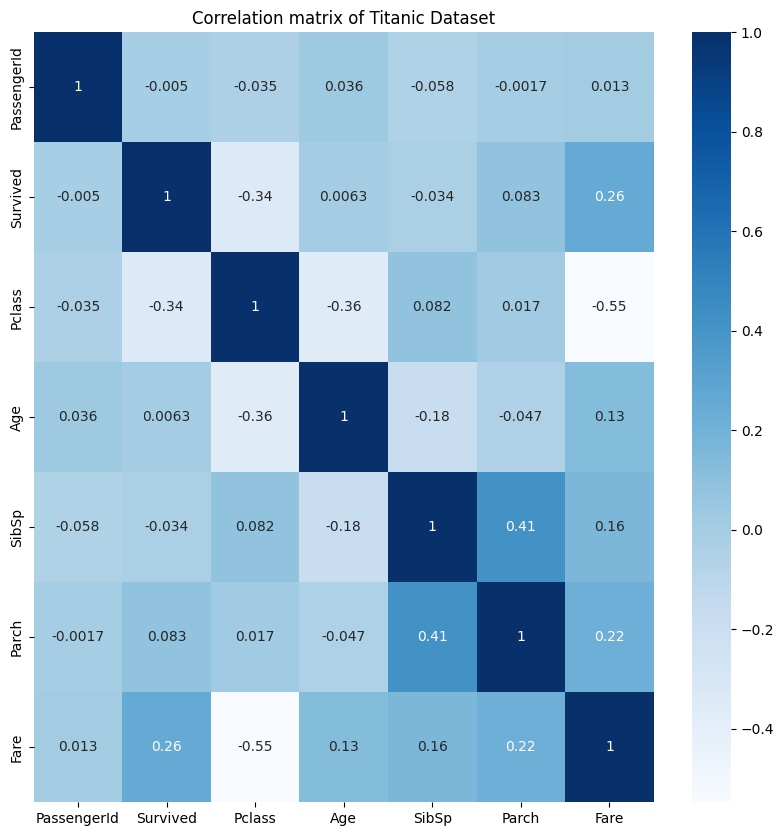

In [46]:
correlation_matrix = data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation_matrix,annot = True, cmap = 'Blues')
plt.title("Correlation matrix of Titanic Dataset")
plt.show()

corr finds the xcorrelation of each column and by ploting this correlation matrix is found.

###*Q7: OUTLIERS*

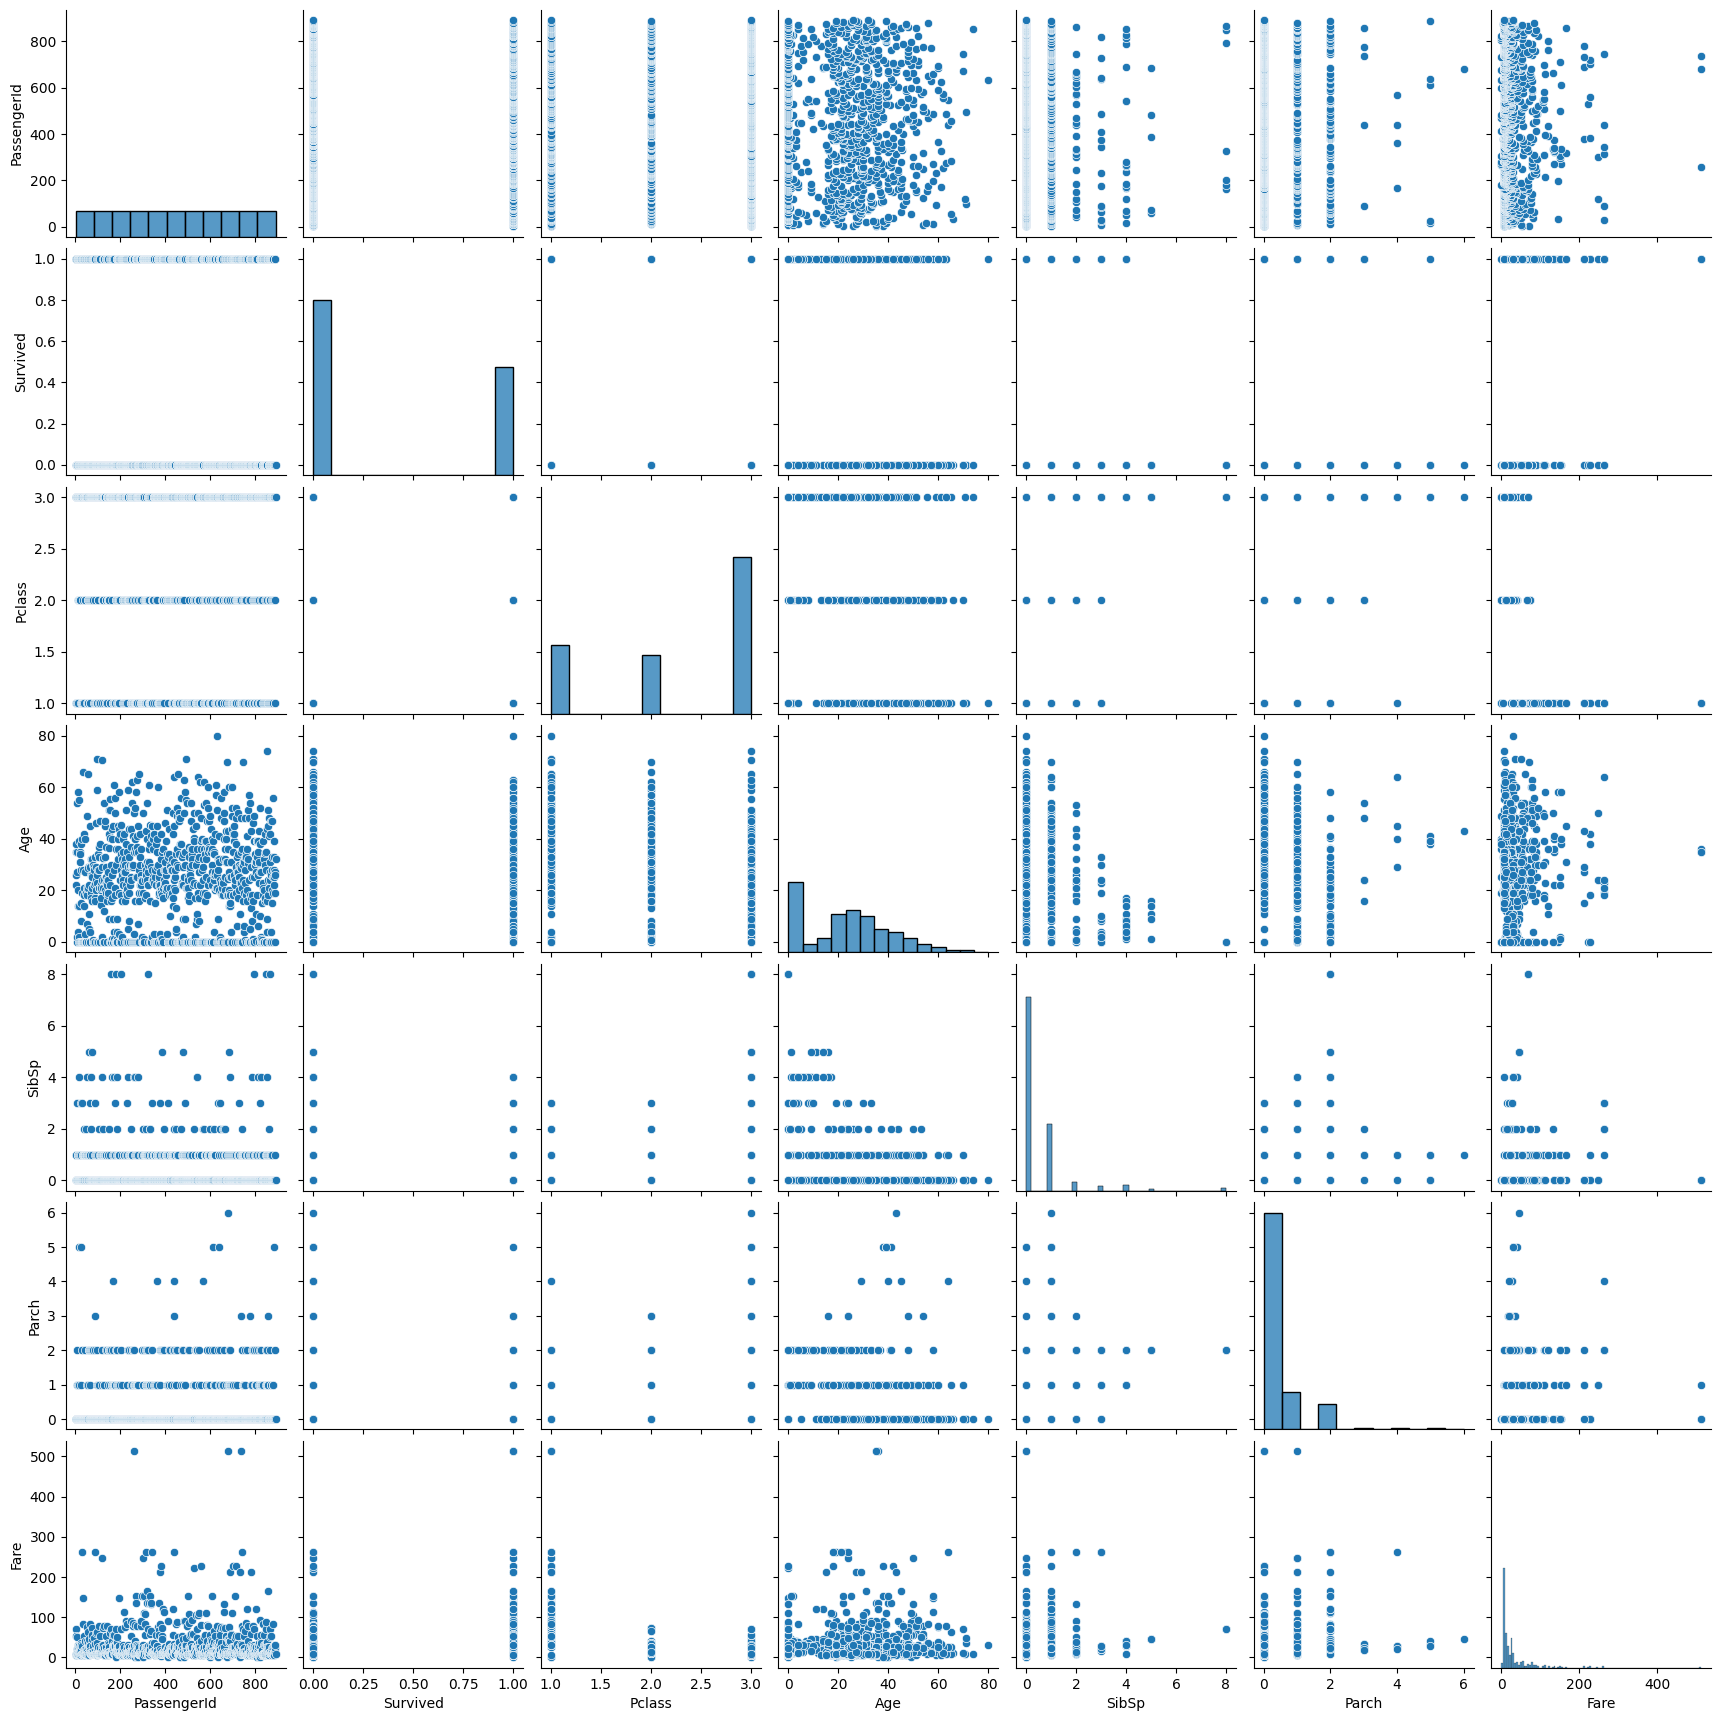

In [47]:
import seaborn as sns

sns.pairplot(data)

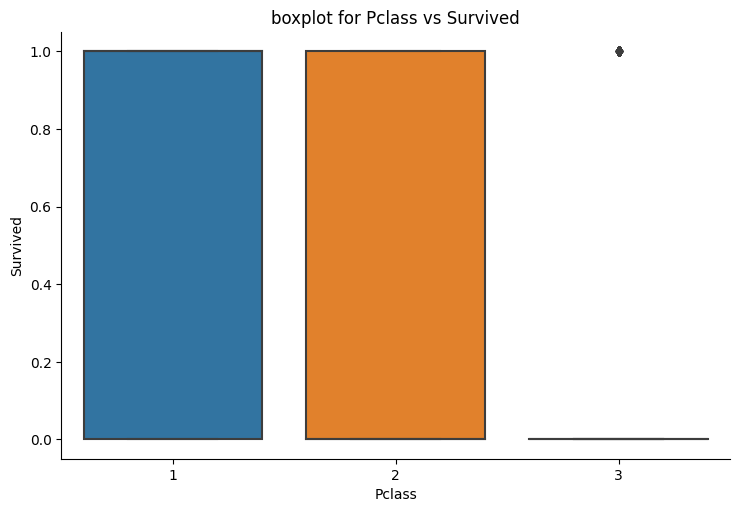

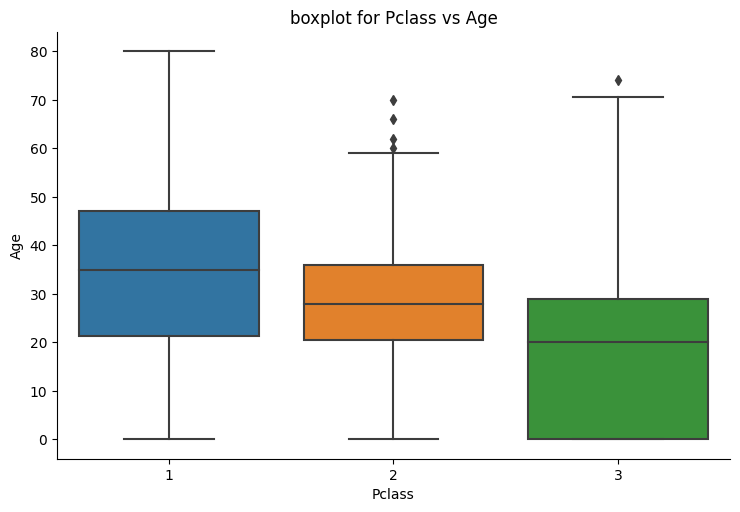

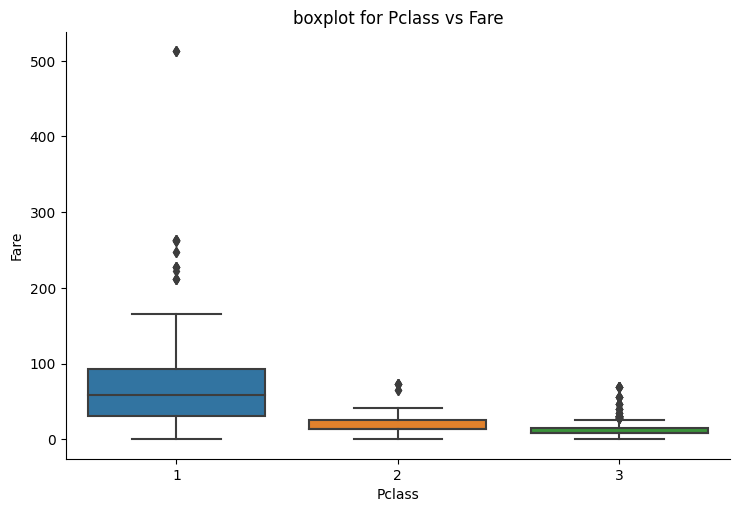

In [48]:
column = ['Survived','Age','Fare']

for i in range(0,3,1):
  sns.catplot(x= "Pclass", y = column[i], data =data, kind = "box",aspect = 1.5)

  if column[i] == 'Survived':
      plt.title("boxplot for Pclass vs Survived")
  elif column[i] == 'Age':
      plt.title("boxplot for Pclass vs Age")
  elif column[i] == 'Fare':
      plt.title("boxplot for Pclass vs Fare")

  plt.show()

Outliers are showned in the numeric columns using boxplot.

###*Q8: DATA DISTRIBUTION*

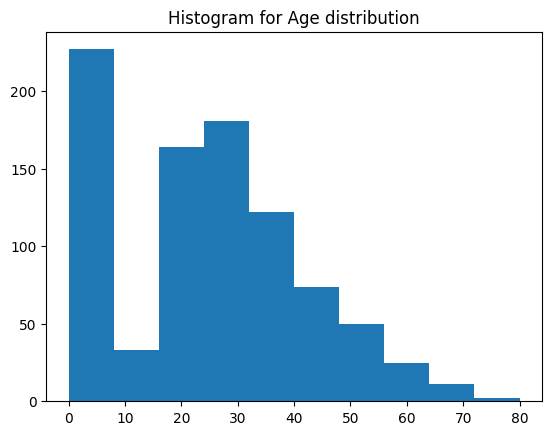

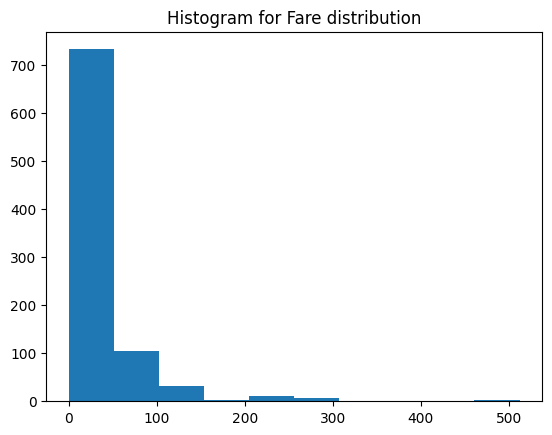

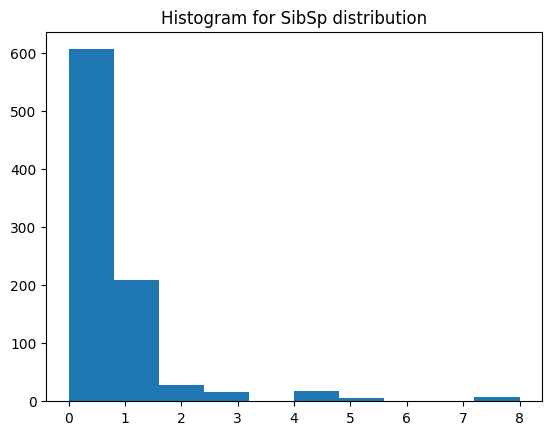

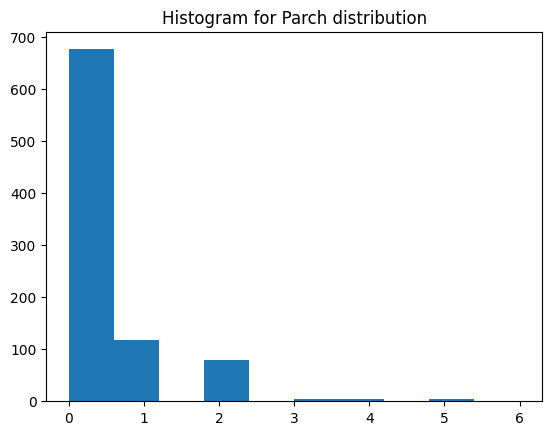

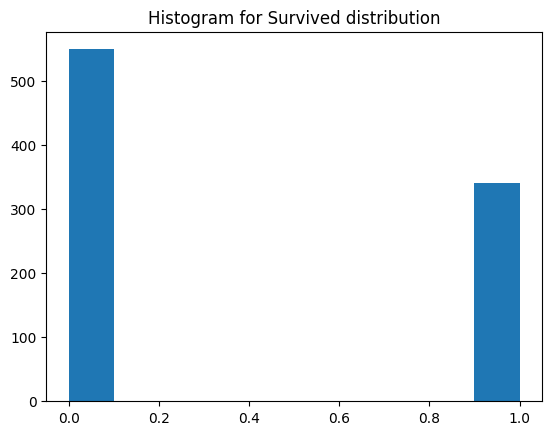

In [50]:
col = ['Age', 'Fare', 'SibSp', 'Parch','Survived']

for i in col:
  plt.hist(data[i], bins = 10 )
  plt.title("Histogram for " + i + " distribution")
  plt.show()

###*Q9: CATEGORICAL VARIABLES*

Sex and Embarked are the categorical columns.

###*Q10: DISTRIBUTION OF CATEGORICAL VARIABLES*

In [52]:
data.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [53]:
data.Sex.value_counts(normalize= True)

male      0.649044
female    0.350956
Name: Sex, dtype: float64

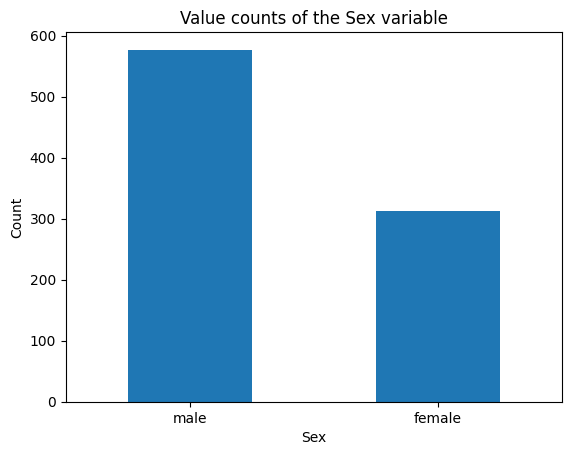

In [54]:
data.Sex.value_counts().plot(kind="bar")
plt.title("Value counts of the Sex variable")
plt.xlabel("Sex")
plt.xticks(rotation = 0)
plt.ylabel("Count")
plt.show()

In [55]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [56]:
data.Pclass.value_counts(normalize = True)

3    0.552306
1    0.240720
2    0.206974
Name: Pclass, dtype: float64

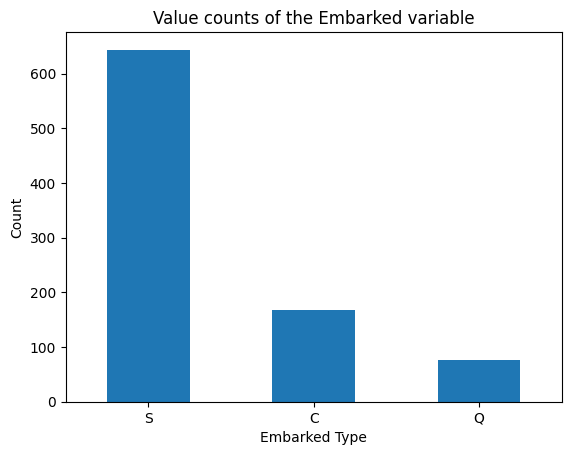

In [57]:
data.Embarked.value_counts().plot(kind="bar")
plt.title("Value counts of the Embarked variable")
plt.xlabel("Embarked Type")
plt.xticks(rotation = 0)
plt.ylabel("Count")
plt.show()

###*Q11: PEOPLE SURVIVED AND DIED*

People survived is found suming the survived column value if it is 1 that means that person survived and for dead vice versa.

In [58]:
total_survived = data['Survived'].value_counts()[1]
total_died = data['Survived'].value_counts()[0]


print("Total no of Passenger Survived are",total_survived)
print("Total no of Passenger Died are",total_died)

Total no of Passenger Survived are 340
Total no of Passenger Died are 549


###*Q12: DISTRIBUTION OF PASSENGER CLASS*

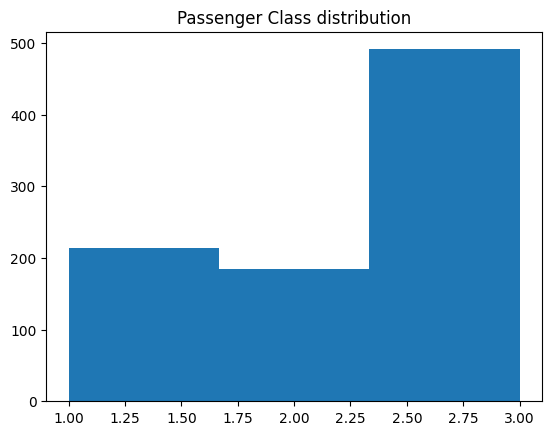

In [59]:
plt.hist(data['Pclass'], bins = 3 )
plt.title("Passenger Class distribution")
plt.show()

###*Q13: DISTRIBUTION OF PASSENGER BY GENDER*


Gender distribution:
male      577
female    312
Name: Sex, dtype: int64


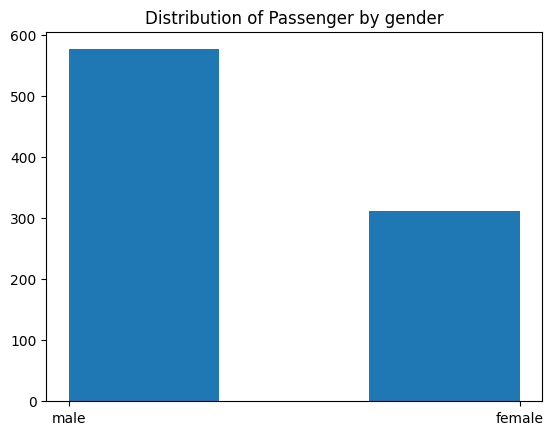

In [61]:
gender_counts = data['Sex'].value_counts()
print("\nGender distribution:")
print(gender_counts)

plt.hist(data['Sex'], bins = 3 )
plt.title("Distribution of Passenger by gender")
plt.show()

###*Q14: AVERAGE AGE OF PASSENGERS*

In [62]:
average_age = data['Age'].mean()
print("\nAverage age of passengers:", average_age)


Average age of passengers: 23.740348706411698


###*Q15: FARE DISTRIBUTION FOR EACH PASSENGER CLASS*

Fare distribution for each passenger class is shown using a boxplot between pclass nad fare.

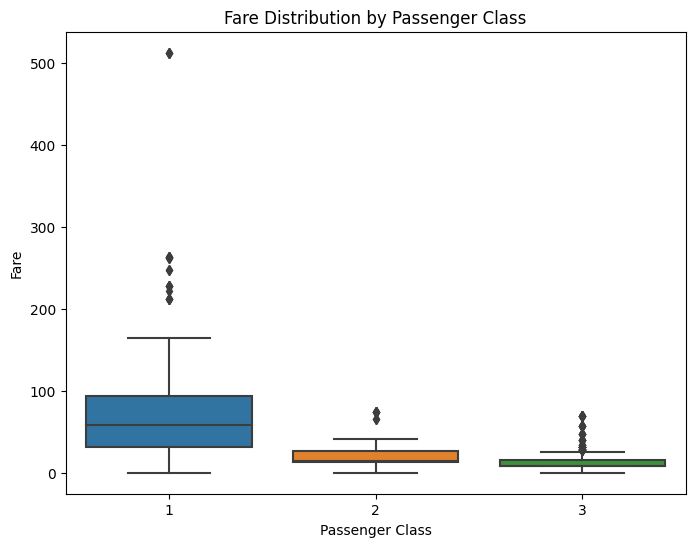

In [63]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Pclass', y='Fare')
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()

###*Q16: SURVIVAL RATE BASED ON PASSENGER CLASS*

Survival rate based on passsenger class is calculated by grouping the two columns and then calculating the mean.

In [64]:
survival_by_class = data.groupby('Pclass')['Survived'].mean()
print("\nSurvival rate based on passenger class:")
print(survival_by_class)


Survival rate based on passenger class:
Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64


###*Q17: SURVIVAL RATE BASED ON GENDER*

Survival rate based on gender is calculated by grouping the two columns and then calculating the mean.

In [68]:
survival_by_gender = data.groupby('Sex')['Survived'].mean()
print("\nSurvival rate based on gender:")
print(survival_by_gender)


Survival rate based on gender:
Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64


###*Q18: DISTRIBUTION OF PASSENGERS BY AGE AND GENDER*

Distribution of passenger by age and gender is shown by plotting a histogram in which age is on xaxis and gender is the hue.

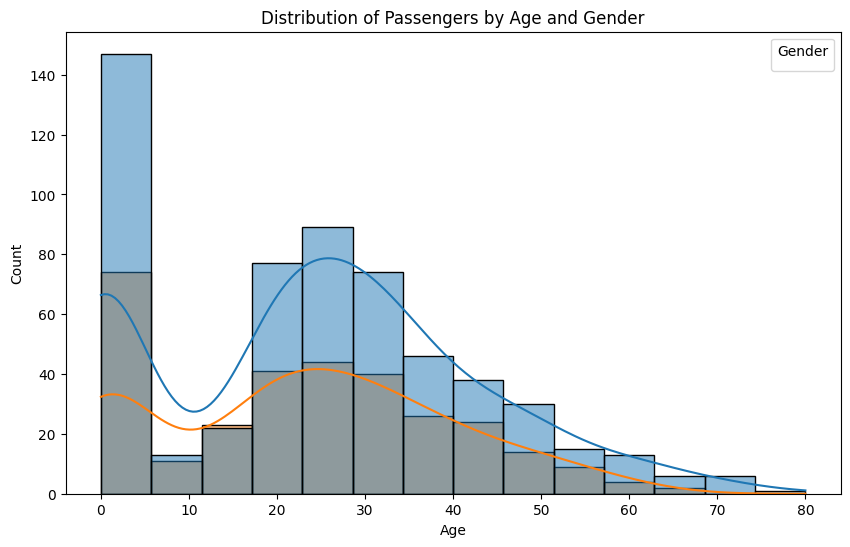

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', hue='Sex', kde=True)
plt.title("Distribution of Passengers by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

###*Q19: DISTRIBUTION OF PASSENGERS BY EMBARKATION PORT*

Distribution of passengers by embarkation plot is shown by plotting the graph of the three embarkation port count of passengers.

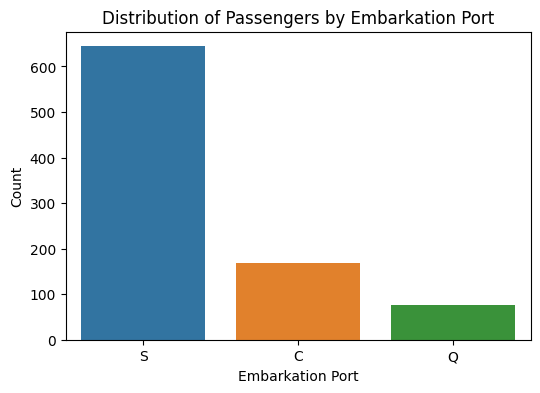


Embarkation port distribution:
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [70]:
port_counts = data['Embarked'].value_counts()
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Embarked')
plt.title("Distribution of Passengers by Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Count")
plt.show()
print("\nEmbarkation port distribution:")
print(port_counts)

###*Q20: SURVIVAL RATE BASED ON EMBARKATION PORT*

Survival rate based on embarkation port is shown by grouping the two columns and then calculating their mean

In [71]:
survival_by_port = data.groupby('Embarked')['Survived'].mean()
print("Survival rate based on embarkation port:")
print(survival_by_port)

Survival rate based on embarkation port:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


###*Q21: SURVIVAL RATE BASED ON NUMBER OF SIBLINGS/SPOUSE*

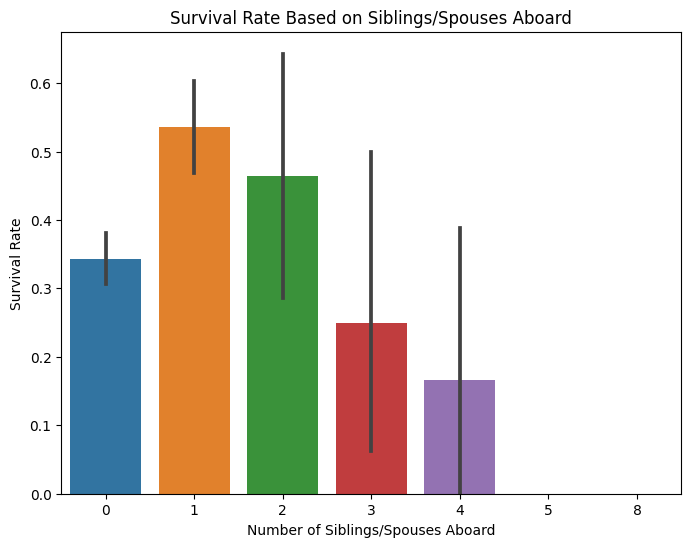

In [72]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='SibSp', y='Survived')
plt.title("Survival Rate Based on Siblings/Spouses Aboard")
plt.xlabel("Number of Siblings/Spouses Aboard")
plt.ylabel("Survival Rate")
plt.show()


###*Q22: SURVIVAL RATE BASED ON NUMBER OF CHILDRENS/PARENTS*

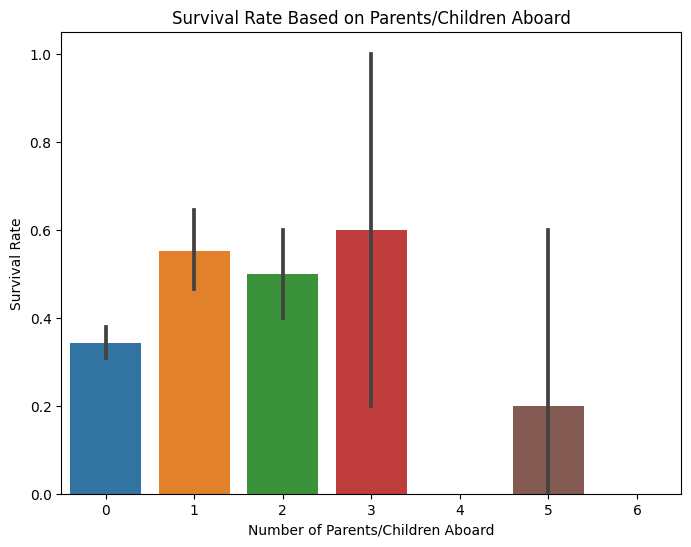

In [73]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Parch', y='Survived')
plt.title("Survival Rate Based on Parents/Children Aboard")
plt.xlabel("Number of Parents/Children Aboard")
plt.ylabel("Survival Rate")
plt.show()